In [20]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
%autoreload 1

In [22]:
%aimport helpers, loaders, plotters 

In [1]:
from pprint import pprint
from math import ceil
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from helpers import load_best_result, save_search_result
from loaders import load_adult, load_mnist
from plotters import plot_means_w_stds, gen_and_plot_learning_curve, plot_learning_curve, gen_and_plot_validation_curve, plot_validation_curve

# Load and Preprocess Data

In [2]:
df = load_adult(preprocess=True)

### Split data into training and testing

In [3]:
X = df[[c for c in df.columns if c != 'target']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

### Skip Scaling for decision trees - it won't make a difference

# Decision Tree Model Complexity

In [4]:
from sklearn.tree import DecisionTreeClassifier

base_clf = DecisionTreeClassifier()

base_clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [5]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,17),
}

In [6]:
grid_search = GridSearchCV(
    estimator=base_clf,
    param_grid=param_grid,
    scoring='accuracy',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1,
)

In [7]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits
[CV] criterion=gini, max_depth=1 .....................................
[CV] criterion=gini, max_depth=1 .....................................
[CV] criterion=gini, max_depth=1 .....................................
[CV] criterion=gini, max_depth=1 .....................................
[CV]  criterion=gini, max_depth=1, score=0.751042061386889, total=   0.0s
[CV]  criterion=gini, max_depth=1, score=0.7510892214434552, total=   0.1s
[CV] criterion=gini, max_depth=2 .....................................
[CV] criterion=gini, max_depth=2 .....................................
[CV]  criterion=gini, max_depth=1, score=0.751042061386889, total=   0.1s
[CV]  criterion=gini, max_depth=2, score=0.8259139988634211, total=   0.1s
[CV] criterion=gini, max_depth=2 .....................................
[CV] criterion=gini, max_depth=2 .....................................
[CV]  criterion=gini, max_depth=2, score=0.8198181129215611, total=   0.

[Parallel(n_jobs=-1)]: Batch computation too fast (0.1165s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s


[CV] criterion=gini, max_depth=4 .....................................
[CV] criterion=gini, max_depth=4 .....................................
[CV]  criterion=gini, max_depth=3, score=0.840310664898655, total=   0.1s
[CV] criterion=gini, max_depth=3 .....................................
[CV]  criterion=gini, max_depth=3, score=0.8436907919666541, total=   0.1s
[CV] criterion=gini, max_depth=3 .....................................
[CV]  criterion=gini, max_depth=3, score=0.8355437665782494, total=   0.1s
[CV]  criterion=gini, max_depth=4, score=0.8438802576733612, total=   0.1s
[CV]  criterion=gini, max_depth=4, score=0.8412578139799204, total=   0.1s
[CV] criterion=gini, max_depth=4 .....................................
[CV] criterion=gini, max_depth=4 .....................................
[CV] criterion=gini, max_depth=5 .....................................
[CV]  criterion=gini, max_depth=3, score=0.8400909435392194, total=   0.1s
[CV] criterion=gini, max_depth=5 .....................

[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s


[CV]  criterion=gini, max_depth=5, score=0.8359226979916635, total=   0.1s
[CV]  criterion=gini, max_depth=6, score=0.8482667171812843, total=   0.1s
[CV] criterion=gini, max_depth=6 .....................................
[CV] criterion=gini, max_depth=7 .....................................
[CV]  criterion=gini, max_depth=6, score=0.8510799545282304, total=   0.2s
[CV] criterion=gini, max_depth=6 .....................................
[CV]  criterion=gini, max_depth=5, score=0.8484274346343312, total=   0.2s
[CV]  criterion=gini, max_depth=6, score=0.8421750663129973, total=   0.1s
[CV] criterion=gini, max_depth=7 .....................................
[CV] criterion=gini, max_depth=8 .....................................
[CV]  criterion=gini, max_depth=7, score=0.849782155711309, total=   0.2s
[CV] criterion=gini, max_depth=7 .....................................
[CV]  criterion=gini, max_depth=6, score=0.8514588859416445, total=   0.2s
[CV] criterion=gini, max_depth=8 .................

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s


[CV]  criterion=gini, max_depth=7, score=0.8512694202349375, total=   0.2s
[CV] criterion=gini, max_depth=9 .....................................
[CV]  criterion=gini, max_depth=9, score=0.8476984277325251, total=   0.2s
[CV] criterion=gini, max_depth=9 .....................................
[CV]  criterion=gini, max_depth=8, score=0.8491852974611596, total=   0.2s
[CV] criterion=gini, max_depth=10 ....................................
[CV]  criterion=gini, max_depth=8, score=0.8535430087154225, total=   0.2s
[CV] criterion=gini, max_depth=10 ....................................
[CV]  criterion=gini, max_depth=9, score=0.8459643804471391, total=   0.2s
[CV]  criterion=gini, max_depth=9, score=0.8535430087154225, total=   0.2s
[CV] criterion=gini, max_depth=11 ....................................
[CV] criterion=gini, max_depth=9 .....................................
[CV]  criterion=gini, max_depth=10, score=0.8471301382837658, total=   0.2s
[CV] criterion=gini, max_depth=10 ..............

[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.9s


[CV]  criterion=gini, max_depth=12, score=0.8478590375142099, total=   0.2s
[CV] criterion=gini, max_depth=12 ....................................
[CV]  criterion=gini, max_depth=11, score=0.8495642288745737, total=   0.2s
[CV] criterion=gini, max_depth=13 ....................................
[CV]  criterion=gini, max_depth=12, score=0.839143615005684, total=   0.2s
[CV] criterion=gini, max_depth=14 ....................................
[CV]  criterion=gini, max_depth=13, score=0.8370903580223528, total=   0.3s
[CV] criterion=gini, max_depth=13 ....................................
[CV]  criterion=gini, max_depth=12, score=0.8467222432739674, total=   0.3s
[CV] criterion=gini, max_depth=14 ....................................
[CV]  criterion=gini, max_depth=13, score=0.8463433118605532, total=   0.2s
[CV] criterion=gini, max_depth=13 ....................................
[CV]  criterion=gini, max_depth=14, score=0.8369009282060996, total=   0.2s
[CV] criterion=gini, max_depth=14 .........

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.2s


[CV] criterion=entropy, max_depth=2 ..................................
[CV]  criterion=gini, max_depth=16, score=0.8300492610837439, total=   0.2s
[CV] criterion=entropy, max_depth=2 ..................................
[CV]  criterion=entropy, max_depth=1, score=0.751042061386889, total=   0.1s
[CV]  criterion=entropy, max_depth=2, score=0.7967418071604471, total=   0.1s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] criterion=entropy, max_depth=2 ..................................
[CV]  criterion=entropy, max_depth=2, score=0.8260704812428951, total=   0.1s
[CV] criterion=entropy, max_depth=2 ..................................
[CV]  criterion=gini, max_depth=16, score=0.8408488063660478, total=   0.2s
[CV] criterion=entropy, max_depth=3 ..................................
[CV]  criterion=entropy, max_depth=2, score=0.8198181129215611, total=   0.1s
[CV]  criterion=entropy, max_depth=3, score=0.840310664898655, total=   0.1s
[CV] criterion=entropy, max_depth=

[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.7s


[CV]  criterion=entropy, max_depth=5, score=0.8402804092459265, total=   0.1s
[CV] criterion=entropy, max_depth=7 ..................................
[CV]  criterion=entropy, max_depth=6, score=0.8478878575487782, total=   0.1s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=6, score=0.8491852974611596, total=   0.2s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=7, score=0.8494032960788028, total=   0.1s
[CV] criterion=entropy, max_depth=7 ..................................
[CV]  criterion=entropy, max_depth=6, score=0.8440697233800682, total=   0.1s
[CV] criterion=entropy, max_depth=8 ..................................
[CV]  criterion=entropy, max_depth=7, score=0.8531640773020084, total=   0.1s
[CV] criterion=entropy, max_depth=7 ..................................
[CV]  criterion=entropy, max_depth=6, score=0.8476695718075028, total=   0.1s
[CV] criterion=entropy, max_

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.6s


[CV]  criterion=entropy, max_depth=10, score=0.8491852974611596, total=   0.2s
[CV] criterion=entropy, max_depth=10 .................................
[CV]  criterion=entropy, max_depth=11, score=0.8463724190187536, total=   0.2s
[CV] criterion=entropy, max_depth=11 .................................
[CV]  criterion=entropy, max_depth=11, score=0.8508904888215233, total=   0.2s
[CV] criterion=entropy, max_depth=11 .................................
[CV]  criterion=entropy, max_depth=10, score=0.8446381205001895, total=   0.2s
[CV] criterion=entropy, max_depth=12 .................................
[CV]  criterion=entropy, max_depth=10, score=0.8450170519136037, total=   0.2s
[CV] criterion=entropy, max_depth=12 .................................
[CV]  criterion=entropy, max_depth=11, score=0.8448275862068966, total=   0.2s
[CV] criterion=entropy, max_depth=13 .................................
[CV]  criterion=entropy, max_depth=11, score=0.8510799545282304, total=   0.2s
[CV]  criterion=entro

[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    6.4s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 17)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=10)

In [8]:
save_search_result(grid_search, 'adult', 'DT')

### Analysis

In [9]:
res = grid_search.cv_results_
res['params']

[{'criterion': 'gini', 'max_depth': 1},
 {'criterion': 'gini', 'max_depth': 2},
 {'criterion': 'gini', 'max_depth': 3},
 {'criterion': 'gini', 'max_depth': 4},
 {'criterion': 'gini', 'max_depth': 5},
 {'criterion': 'gini', 'max_depth': 6},
 {'criterion': 'gini', 'max_depth': 7},
 {'criterion': 'gini', 'max_depth': 8},
 {'criterion': 'gini', 'max_depth': 9},
 {'criterion': 'gini', 'max_depth': 10},
 {'criterion': 'gini', 'max_depth': 11},
 {'criterion': 'gini', 'max_depth': 12},
 {'criterion': 'gini', 'max_depth': 13},
 {'criterion': 'gini', 'max_depth': 14},
 {'criterion': 'gini', 'max_depth': 15},
 {'criterion': 'gini', 'max_depth': 16},
 {'criterion': 'entropy', 'max_depth': 1},
 {'criterion': 'entropy', 'max_depth': 2},
 {'criterion': 'entropy', 'max_depth': 3},
 {'criterion': 'entropy', 'max_depth': 4},
 {'criterion': 'entropy', 'max_depth': 5},
 {'criterion': 'entropy', 'max_depth': 6},
 {'criterion': 'entropy', 'max_depth': 7},
 {'criterion': 'entropy', 'max_depth': 8},
 {'criter

In [10]:
gini_train_mean, ig_train_mean = np.split(res['mean_train_score'], 2)
gini_train_std, ig_train_std = np.split(res['std_train_score'], 2)
gini_test_mean, ig_test_mean = np.split(res['mean_test_score'], 2)
gini_test_std, ig_test_std = np.split(res['std_test_score'], 2)

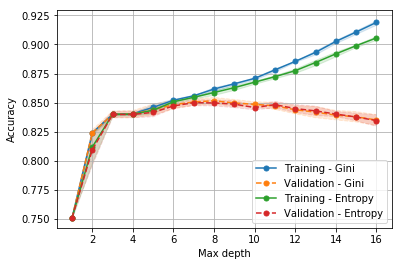

In [27]:
plot_means_w_stds(
    means=(gini_train_mean, gini_test_mean, ig_train_mean, ig_test_mean,),
    stds=(gini_train_std, gini_test_std,ig_train_std, ig_test_std),
    xrange=param_grid['max_depth'],
    linestyles=['-', '--', '-', '--'],
    series_labels=('Training - Gini', 'Validation - Gini', 'Training - Entropy', 'Validation - Entropy',),
    ylabel='Accuracy',
    xlabel='Max depth',
)

In [14]:
gini_fit_mean, ig_fit_mean = np.split(res['mean_fit_time'], 2)
gini_fit_std, ig_fit_std = np.split(res['std_fit_time'], 2)

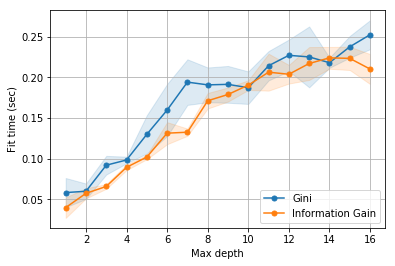

In [15]:
plot_means_w_stds(
    means=(gini_fit_mean, ig_fit_mean),
    stds=(gini_fit_std, ig_fit_std),
    xrange=param_grid['max_depth'],
    series_labels=('Gini', 'Information Gain'),
    ylabel='Fit time (sec)',
    xlabel='Max depth',
)

## Learning curve analysis

In [28]:
best_params = res['params'][np.argmax(res['mean_test_score'])]
pprint(best_params)

{'criterion': 'gini', 'max_depth': 8}


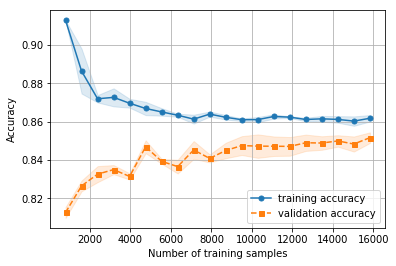

In [23]:
clf = DecisionTreeClassifier(**best_params)
train_sizes, _, _, train_mean, train_std, test_mean, test_std = gen_and_plot_learning_curve(clf, X_train, y_train, ylim=None, cv=4, train_sizes=np.linspace(.05, 1.0, 20))